<a href="https://colab.research.google.com/github/josh-shah/josh-shah.github.io/blob/main/Kmeansclustering_Spendvsrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#important tools needed
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
#open the dataset
df = pd.read_csv("/content/5YearSpend_FinalPosition_project.csv")

In [4]:
df.shape

(86, 4)

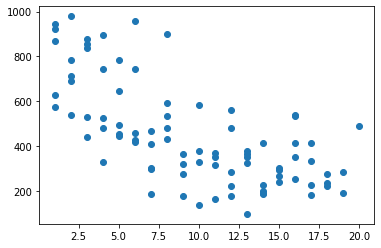

In [5]:
plt.scatter(df['pl_seasonfinish'], df['5year_spend'])

In [6]:
#6 clusters of all different combinations of different spending levels and different season ranks
km = KMeans(n_clusters=6)

In [7]:
X = df[['pl_seasonfinish','5year_spend']]


In [8]:
#Fit and predict the data
clubclusters = km.fit_predict(X)

In [9]:
#Get all the Labels (clusters)
km.labels_

array([5, 0, 5, 3, 2, 2, 2, 2, 0, 0, 3, 3, 5, 5, 5, 5, 5, 0, 0, 4, 1, 4,
       4, 4, 5, 5, 5, 5, 5, 3, 2, 2, 2, 3, 5, 5, 0, 5, 5, 0, 0, 3, 3, 3,
       0, 1, 2, 2, 2, 3, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 0, 0, 0, 0, 3, 5,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 0, 3, 3, 3, 2, 5, 0, 0, 0, 3],
      dtype=int32)

In [10]:
#check if predicted clusters are the same as our labels
clubclusters is km.labels_

True

In [11]:
#Centroid
km.cluster_centers_

array([[ 12.04347826, 322.5573913 ],
       [  3.5       , 742.86833333],
       [  7.16666667, 564.64166667],
       [  8.76470588, 446.95235294],
       [  3.2       , 903.83      ],
       [ 13.88888889, 194.43333333]])

In [12]:
#store and map
df['cluster_clubs'] = clubclusters

In [13]:
df

,season_id,club,5year_spend,pl_seasonfinish,cluster_clubs
0,2018,AFC Bournemouth,226.52,14,5
1,2019,AFC Bournemouth,276.61,18,0
2,2022,AFC Bournemouth,186.05,14,5
3,2018,Arsenal FC,491.48,5,3
4,2019,Arsenal FC,533.30,8,2
...,...,...,...,...,...
81,2018,Wolverhampton Wanderers,186.65,7,5
82,2019,Wolverhampton Wanderers,299.50,7,0
83,2020,Wolverhampton Wanderers,377.75,13,0
84,2021,Wolverhampton Wanderers,379.25,10,0


In [16]:
#save as csv
df.to_csv('clubs_cluster.csv')

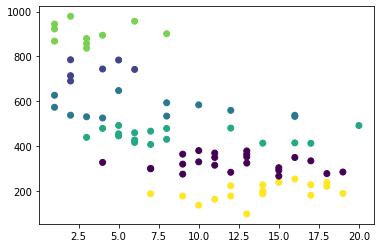

In [15]:
#plotting the K-means clustered map
plt.scatter(df['pl_seasonfinish'],df['5year_spend'],c=df['cluster_clubs'])